### 시각화전력
- 시각화의 목표 : USD/KRW 환율, 국제 금 값, 코스피 지수의 관계
- 시각화의 범위 : 2013~2022 1년 평균 종가 기준
- 시각화의 개발절차 : www.investing.com에서 2013년도 부터 2022년도 까지의 데이터를 USD/KRW 환율, 국제 금 값, 코스피 지수의 데이터를 합침

### 시각화 요구사항
- 사용자수준 / 취향 / 목적 : 인플레이션이 치솟는 이 시대에서 어떻게 투자를 해야할까 고민하는 성인
- 시나리오 : 스토리보드 개발 : USD/KRW 환율과,코스피 지수, 국제 금 값의 관계를 알고싶고, 달러 투자, 코스피, 금 중에 어느것이 가장 수익률이 좋은가(년도별 누적수익률 종가 기준).
- 누적합 : pandas.Series.cumsum

### 데이터 시각화 명세서
- 시각화 표현의 형태, 규칙, 패턴, 상호작용 : 년도 별 linespot, 각각의 상관관계를 알기 위해 heatmap,

### 시각화 명세서 기반 설계
- 시각화 UI 설계 : 년도별 linespot 한 곳에 국제 금값,KOSPI지수,USD/KRW지수를 한번에 시각화 하였음. 각각의 상관관계를 보기 편하게 heatmap으로 한번에 표시함. 년도별 linespot 한 곳에 국제 금값 누적 수익률,KOSPI 누적 수익률,USD/KRW 누적 수익율 한번에 시각화

In [1]:
# 필요 라이브러리
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
# 한글 글꼴 넣어주기
current_font_list = matplotlib.rcParams['font.family']
font_path = "C:\Windows\Fonts\gulim.ttc"
kfont = matplotlib.font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rcParams['font.family'] = [kfont] + current_font_list

In [2]:
GD_data = pd.read_csv('../금 선물 내역.csv')
ER_data = pd.read_csv('../USD_KRW 내역.csv')
KP_data = pd.read_csv('../코스피지수 내역.csv')

In [3]:
def normal(pd_data,x):
    min_x = pd_data[x].min()
    max_x = pd_data[x].max()
    pd_data[x+'_norm'] = pd_data[x].apply(lambda x :(x-min_x)/(max_x-min_x))
    return pd_data[x+'_norm']

def std(pd_data,x):
    x_mean = pd_data[x].mean()
    x_std = pd_data[x].std()
    pd_data[x+'_std'] = pd_data[x].apply(lambda x: (x-x_mean)/x_std)
    return pd_data[x+'_std']

In [4]:
datalist = [GD_data,ER_data,KP_data]
for i in datalist:
    for j,v in enumerate(i['날짜']):
        i['날짜'][j] = v.split('-')[0]

C:\Users\ITPS\AppData\Local\Temp\ipykernel_7912\272338915.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['날짜'][j] = v.split('-')[0]


In [5]:
def myfn(x):
    try:
        if ',' in x:
            return x.replace(',','')
        else:
            return x
    except:
        return '0'
def myfn2(x):
    return x.apply(myfn)

GD_data = GD_data.apply(myfn2)
ER_data = ER_data.apply(myfn2)
KP_data = KP_data.apply(myfn2)

In [6]:
GD_data['종가'] = GD_data['종가'].astype(np.float64)
ER_data['종가'] = ER_data['종가'].astype(np.float64)
KP_data['종가'] = KP_data['종가'].astype(np.float64)

g1=GD_data.groupby('날짜').mean()
g2=ER_data.groupby('날짜').mean()
g3=KP_data.groupby('날짜').mean()

g1.name = '국제금값시세'
g2.name = 'USD/KRW환율'
g3.name = 'KOSPI지수'

C:\Users\ITPS\AppData\Local\Temp\ipykernel_7912\1724473262.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  g1=GD_data.groupby('날짜').mean()
C:\Users\ITPS\AppData\Local\Temp\ipykernel_7912\1724473262.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  g2=ER_data.groupby('날짜').mean()
C:\Users\ITPS\AppData\Local\Temp\ipykernel_7912\1724473262.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  g3=KP_data.groupby('날짜')

In [7]:
df_combined = pd.concat((g1,g2,g3),axis =1)
df_combined.columns = ['국제금값시세','USD/KRW환율','KOSPI지수']
df_combined=df_combined.reset_index()

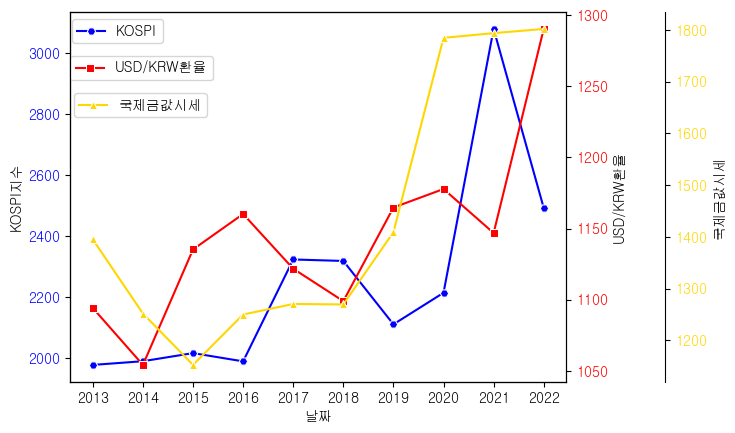

In [8]:
fig1 = plt.figure()

a1=fig1.add_subplot()
a2 = a1.twinx()
a3 = a1.twinx()
a3.spines.right.set_position(("axes",1.2))

a1.tick_params(axis = 'y',labelcolor='blue')
a2.tick_params(axis = 'y',labelcolor= 'red')
a3.tick_params(axis = 'y',labelcolor= 'gold')

sns.lineplot(data=df_combined,x='날짜',y='KOSPI지수',ax=a1,label = 'KOSPI',color='blue',marker='H')
sns.lineplot(data=df_combined,x=np.arange(10),y='USD/KRW환율',ax=a2,label='USD/KRW환율',color='red',marker='s')
sns.lineplot(data=df_combined,x=np.arange(10),y='국제금값시세',ax=a3,label='국제금값시세',color='gold',marker='^')

a1.legend(bbox_to_anchor=(0.2, 1))
a2.legend(bbox_to_anchor=(0.301, 0.9))
a3.legend(bbox_to_anchor=(0.29, 0.8))

# sns.lineplot(data=df_combined,x='날짜',y='USD/KRW환율',ax=a,label = '환율',color = 'green')
# sns.lineplot(data=df_combined,x='날짜',y='KOSPI지수',ax=a, label = 'KOSPI',color ='blue')

C:\Users\ITPS\AppData\Local\Temp\ipykernel_7912\2896101494.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_combined.corr(),annot=True,cmap='Reds')


<AxesSubplot: >

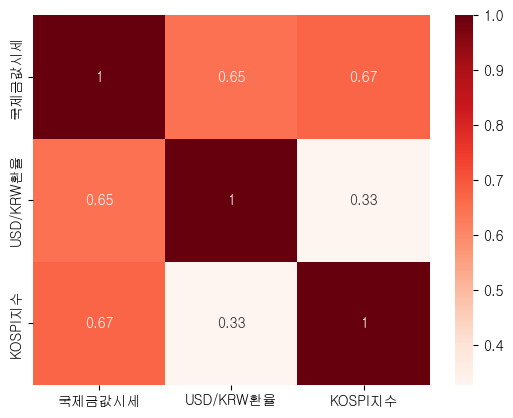

In [9]:
sns.heatmap(df_combined.corr(),annot=True,cmap='Reds')

In [10]:
df_PROFIT = df_combined.drop('날짜',axis=1)

In [11]:
# 수익률 계산
df_PROFIT = df_PROFIT.pct_change()
df_PROFIT

,국제금값시세,USD/KRW환율,KOSPI지수
0,NaN,NaN,NaN
1,-0.102574,-0.036562,0.006147
2,-0.079316,0.077020,0.013319
3,0.084508,0.021950,-0.013400
4,0.016261,-0.033175,0.167747
5,-0.000702,-0.020301,-0.002105
6,0.109981,0.059876,-0.089519
7,0.266473,0.011174,0.048937
8,0.005062,-0.026264,0.390318
9,0.004554,0.125109,-0.190532


In [12]:
# 누적 수익률 계산
df_PROFIT_ACC = (1+df_PROFIT).cumprod()-1
df_PROFIT_ACC

,국제금값시세,USD/KRW환율,KOSPI지수
0,NaN,NaN,NaN
1,-0.102574,-0.036562,0.006147
2,-0.173755,0.037642,0.019548
3,-0.103930,0.060418,0.005887
4,-0.089360,0.025239,0.174621
5,-0.089999,0.004425,0.172148
6,0.010084,0.064566,0.067218
7,0.279244,0.076462,0.119445
8,0.285720,0.048189,0.556384
9,0.291575,0.179328,0.259843


In [13]:
# 연도별 log 수익률 계산
df_LOG_PROFIT = np.log(df_PROFIT+1)
df_LOG_PROFIT

,국제금값시세,USD/KRW환율,KOSPI지수
0,NaN,NaN,NaN
1,-0.108225,-0.037247,0.006129
2,-0.082639,0.074198,0.013231
3,0.081127,0.021712,-0.013490
4,0.016130,-0.033737,0.155076
5,-0.000702,-0.020510,-0.002108
6,0.104343,0.058152,-0.093782
7,0.236236,0.011112,0.047777
8,0.005049,-0.026615,0.329532
9,0.004543,0.117880,-0.211378


In [15]:
#누적 log 수익률 계산
df_LOG_PROFIT_ACC = df_LOG_PROFIT.cumsum()
df_LOG_PROFIT_ACC = df_LOG_PROFIT_ACC * 100

In [25]:
# df_LOG_PROFIT_ACC.insert(0,'날짜',df_combined['날짜'])
df_LOG_PROFIT_ACC = df_LOG_PROFIT_ACC.fillna(0)
df_LOG_PROFIT_ACC

,날짜,국제금값시세,USD/KRW환율,KOSPI지수
0,2013,0.000000,0.000000,0.000000
1,2014,-10.822485,-3.724724,0.612851
2,2015,-19.086377,3.695091,1.935968
3,2016,-10.973710,5.866307,0.586938
4,2017,-9.360724,2.492568,16.094532
5,2018,-9.430943,0.441531,15.883781
6,2019,1.003367,6.256695,6.505562
7,2020,24.626959,7.367941,11.283279
8,2021,25.131907,4.706405,44.236520
9,2022,25.586226,16.494437,23.098720


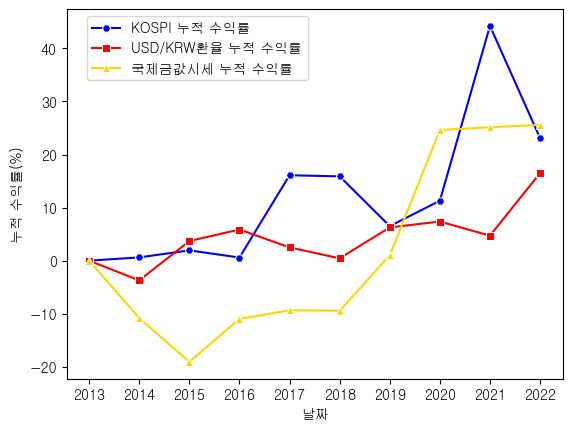

In [33]:
fig2 = plt.figure()

a1=fig2.add_subplot()
a3.spines.right.set_position(("axes",1.2))
plt.ylabel('누적 수익률(%)')
sns.lineplot(data=df_LOG_PROFIT_ACC,x='날짜',y='KOSPI지수',ax=a1,label = 'KOSPI 누적 수익률',color='blue',marker='H')
sns.lineplot(data=df_LOG_PROFIT_ACC,x=np.arange(10),y='USD/KRW환율',label='USD/KRW환율 누적 수익률',color='red',marker='s')
sns.lineplot(data=df_LOG_PROFIT_ACC,x=np.arange(10),y='국제금값시세',label='국제금값시세 누적 수익률',color='gold',marker='^')

a1.legend(bbox_to_anchor=(0.5, 1))
a2.legend(bbox_to_anchor=(0.5, 0.9))
a3.legend(bbox_to_anchor=(0.5, 0.8))